In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

In [ ]:
# Load the dataset
data = pd.read_csv('New_DT.csv')

In [ ]:
data

,Day,Outlook,Temp,Humidity,Wind,PlayTennis
0,N1,sunny,hot,normal,strong,Yes
1,N2,sunny,hot,normal,strong,No
2,N3,rain,cold,normal,strong,No
3,N4,sunny,cold,high,strong,Yes
4,N5,overcast,cold,high,weak,Yes
5,N6,overcast,cold,normal,strong,No
6,N7,rain,cold,normal,weak,Yes
7,N8,rain,hot,high,weak,No
8,N9,overcast,mild,high,weak,No
9,N10,sunny,hot,high,weak,Yes


In [ ]:
# Encoding categorical variables
label_encoders = {}

for column in data.columns[1:]: # Ignore 'Day' as it’s an identifier
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [ ]:
# Splitting data into features (X) and target (y)
X = data.drop(['Day', 'PlayTennis'], axis=1) # Features
y = data['PlayTennis'] # Target

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Separating features and target variable
X = data[['Outlook', 'Temp', 'Humidity', 'Wind']] # Feature columns
y = data['PlayTennis'] # Target column

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
# Train the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0])

In [ ]:
y_test

,PlayTennis
9,1
11,1
0,1


In [ ]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

Model accuracy: 0.3333333333333333



Confusion Matrix:
[[0 0]
 [2 1]]


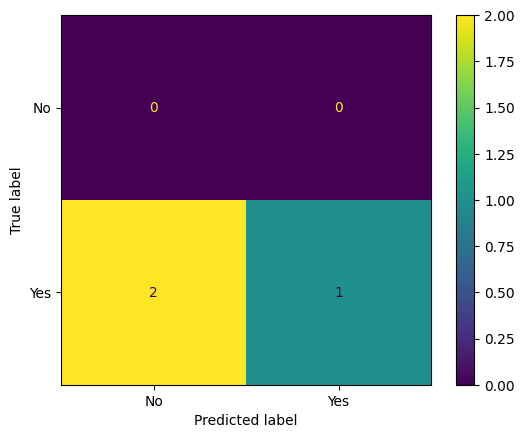

In [ ]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,display_labels=label_encoders['PlayTennis'].classes_)

In [ ]:
# Show actual vs predicted values for each test sample
print("\nActual vs Predicted:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {label_encoders['PlayTennis'].inverse_transform([actual])[0]}, "
          f"Predicted: {label_encoders['PlayTennis'].inverse_transform([predicted])[0]}")


Actual vs Predicted:
Actual: Yes, Predicted: Yes
Actual: Yes, Predicted: No
Actual: Yes, Predicted: No


In [ ]:
# Example prediction for new input {rain, mild, high, strong}
input_data = pd.DataFrame({
'Outlook': [label_encoders['Outlook'].transform(['rain'])[0]],
'Temp': [label_encoders['Temp'].transform(['mild'])[0]],
'Humidity': [label_encoders['Humidity'].transform(['high'])[0]],
'Wind': [label_encoders['Wind'].transform(['strong'])[0]]
                            })

In [ ]:
# Predict whether to play tennis
prediction = model.predict(input_data)
result = label_encoders['PlayTennis'].inverse_transform(prediction)
print("\nPrediction for input {rain, mild, high, strong}: Play Tennis =",result[0])


Prediction for input {rain, mild, high, strong}: Play Tennis = No


In [ ]:
# Example prediction for new input {rain, mild, high, strong}
input_data = pd.DataFrame({
'Outlook': [label_encoders['Outlook'].transform(['sunny'])[0]],
'Temp': [label_encoders['Temp'].transform(['hot'])[0]],
'Humidity': [label_encoders['Humidity'].transform(['normal'])[0]],
'Wind': [label_encoders['Wind'].transform(['weak'])[0]]
                            })

In [ ]:
# Predict whether to play tennis
prediction = model.predict(input_data)
result = label_encoders['PlayTennis'].inverse_transform(prediction)
print("\nPrediction for input {rain, mild, high, strong}: Play Tennis =",result[0])


Prediction for input {rain, mild, high, strong}: Play Tennis = Yes
